In [3]:
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import ast
import networkx as nx

In [4]:
def clean_payoffs(payoffs):
    payoffs.drop_duplicates(inplace=True)
    decision_names = payoffs.T.columns
    actor_names = ["coalition_appchester", 'coalition_discharge','coalition_watersupply', "hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation" , "environment" , "flood_risk" ,"flood_duration"]
    payoffs.columns = actor_names
    payoffs[["coalition_appchester", 'coalition_discharge','coalition_watersupply',"hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation"]] = payoffs[["coalition_appchester", 'coalition_discharge','coalition_watersupply',"hydropower_revenue" , "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation"]]*-1
    payoffs[["environment" , "flood_risk" ,"flood_duration"]] = payoffs[["environment" , "flood_risk" ,"flood_duration"]]*-1

    return payoffs


In [15]:
outcomes = []
with open('../output/processed/txt/bestruns10years.txt', 'r') as f:
    for line in f:
        currentoutcome = line[:-1]
        outcomes.append(currentoutcome)
outcomes
payoffs = pd.DataFrame.from_dict(ast.literal_eval(outcomes[0]), orient = 'index')

In [16]:
payoffs

,0,1,2,3,4,5,6,7,8
best_app,-3699.073316,-28.159737,-0.675786,-0.450311,-0.602478,-0.711071,0.156733,0.668486,1.666667
best_ch,-5318.165775,-39.008561,-0.667526,-0.581637,-0.578488,-0.779286,0.083998,0.399596,0.908333
best_comp,-5362.121629,-40.528147,-0.641976,-0.407831,-0.537078,-0.811786,0.051760,0.330916,0.908333
best_dfl,-3258.712169,-27.233753,-0.019249,-0.009397,-0.009331,0.000000,0.000000,0.000000,0.000000
best_env,-4573.384266,-34.137925,-0.669926,-0.499798,-0.603966,-0.707857,0.145141,0.424072,1.666667
best_hfl,-5362.121629,-40.528147,-0.641976,-0.407831,-0.537078,-0.811786,0.051760,0.330916,0.908333
best_hydro,-5465.490478,-40.101700,-0.675089,-0.049786,-0.596771,-0.743571,0.084942,0.392825,0.848333
best_rec,-4522.149263,-31.034846,-0.674967,-0.576842,-0.605005,-0.704643,0.125634,0.582565,1.666667


In [5]:
coalitions = ['coalition_appchester', 'coalition_appchester2','coalition_discharge','coalition_watersupply' ]

def coalition_method(method_num, payoffs1):
    payoffs = payoffs1.copy()    
    #print(payoffs1.columns)
    payoffs.drop(columns = coalitions, inplace = True, errors= 'ignore')
    #print(payoffs1.columns)
    desired_actors = []

    if method_num ==0:
        #payoffs = payoffs.drop(columns = 'coalition_appchester')
        desired_actors = [x for x in payoffs.columns if x not in ['flood_risk'] + coalitions]

    if method_num ==1:
        payoffs['coalition_appchester'] = payoffs1['coalition_appchester']
        desired_actors = [x for x in payoffs.columns if x not in ['flood_risk', 'atomic_power_plant_discharge', 'chester_discharge']]

    if method_num ==2:
        payoffs['coalition_appchester2'] = (payoffs['atomic_power_plant_discharge'] + payoffs['chester_discharge'])/2
        #payoffs = payoffs.drop(columns = 'coalition_appchester')
        desired_actors = [x for x in payoffs.columns if x not in ['flood_risk', 'atomic_power_plant_discharge', 'chester_discharge']]

    if method_num == 3:
        payoffs['coalition_discharge'] = payoffs1['coalition_discharge'] 
        #payoffs['coalition_discharge'] = (payoffs['atomic_power_plant_discharge'] + payoffs['chester_discharge'] + payoffs['baltimore_discharge'])/3
        #payoffs = payoffs.drop(columns = 'coalition_appchester')
        desired_actors = [x for x in payoffs.columns if x not in ['flood_risk', 'atomic_power_plant_discharge', 'chester_discharge', 'baltimore_discharge']]

    if method_num ==4:
        payoffs['coalition_watersupply'] = payoffs1['coalition_watersupply'] 
        #payoffs['coalition_watersupply'] = (payoffs['chester_discharge'] + payoffs['baltimore_discharge'])/2
        #payoffs = payoffs.drop(columns = 'coalition_appchester')
        desired_actors = [x for x in payoffs.columns if x not in ['flood_risk', 'chester_discharge', 'baltimore_discharge']]

    return payoffs, desired_actors

In [6]:
from games import games
def disp_coalitions(payoffs):
    #payoffs, desired_actors = coalition_method(method_num, payoff_input)
    #print(desired_actors)

    game = games(payoffs, desired_actors)
    game.set_parameters()

    graphs = []
    for i in desired_actors:
        graphs.append(game.preference_direction([i]))
    all_outcome = game.preference_direction(desired_actors)

    return game, graphs, all_outcome

In [7]:
#actors = ["Peach Bottom and Chester", "Hydropower Revenue", "Baltimore Discharge", "Recreation" , "Environment", "Flood Duration"]

In [8]:
payoffs, desired_actors = coalition_method(3, payoffs_input)
payoffs

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk,flood_duration,coalition_discharge
best_app,35.568728,0.675800,0.451259,0.602552,0.821429,-0.102221,-0.665879,0.166667,0.476137
best_ch,49.940381,0.667644,0.581969,0.579072,0.786786,-0.042577,-0.537327,0.166667,0.584996
best_comp,51.667794,0.675110,0.409704,0.582246,0.822143,-0.021685,-0.341538,0.166667,0.394626
best_dfl,41.194136,0.028360,0.013866,0.014254,0.000357,-0.000000,-0.000000,-0.000000,0.013079
best_env,45.301392,0.669933,0.499956,0.603975,0.821429,-0.086643,-0.489965,0.166667,0.517670
best_hydro,50.092336,0.675141,0.054612,0.597697,0.893214,-0.041516,-0.502633,0.166667,0.135322
best_rec,47.013272,0.675000,0.577168,0.604782,0.750357,-0.080382,-0.488104,0.168333,0.583327


Nash Equilibrium: What will be my startegy that guarantees a maximum outcome in a plurality game?



In [66]:
payoffs.columns

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk,flood_duration,coalition_appchester2
best_app,35.568728,0.675800,0.451259,0.602552,0.821429,-0.102221,-0.665879,0.166667,0.639176
best_ch,49.940381,0.667644,0.581969,0.579072,0.786786,-0.042577,-0.537327,0.166667,0.623358
best_comp,51.667794,0.675110,0.409704,0.582246,0.822143,-0.021685,-0.341538,0.166667,0.628678
best_dfl,41.194136,0.028360,0.013866,0.014254,0.000357,-0.000000,-0.000000,-0.000000,0.021307
best_env,45.301392,0.669933,0.499956,0.603975,0.821429,-0.086643,-0.489965,0.166667,0.636954
best_hydro,50.092336,0.675141,0.054612,0.597697,0.893214,-0.041516,-0.502633,0.166667,0.636419
best_rec,47.013272,0.675000,0.577168,0.604782,0.750357,-0.080382,-0.488104,0.168333,0.639891


['hydropower_revenue', 'atomic_power_plant_discharge', 'baltimore_discharge', 'chester_discharge', 'recreation', 'environment', 'flood_duration']


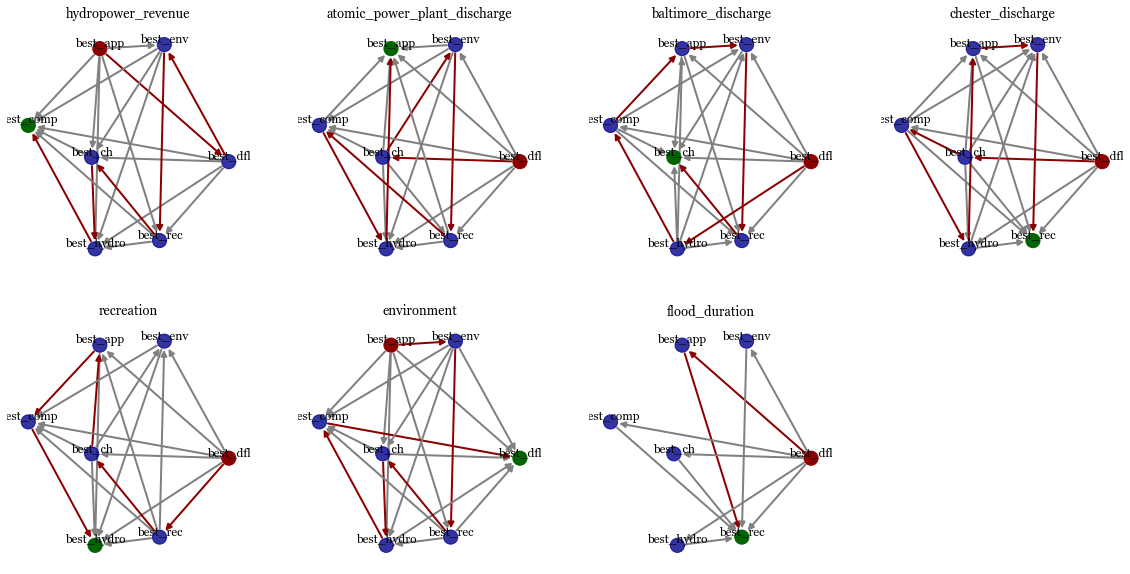

In [145]:
payoffs, desired_actors = coalition_method(1, payoffs_input)
desired_actors = ['hydropower_revenue',
 'atomic_power_plant_discharge',
 'baltimore_discharge',
 'chester_discharge',
 'recreation',
 'environment',
 'flood_duration']
game, graphs, all_outcome = disp_coalitions(payoffs)
game.plot_aggregation(graphs, 'cardinal_resultant', desired_actors)

In [37]:
#for i in []
all_outcome.nodes['best_ch']

{'total_utility': 5.320356122411906,
 'hydropower_revenue': 0.8927010214786666,
 'baltimore_discharge': 1.0,
 'recreation': 0.8808,
 'environment': 0.5834826619275801,
 'flood_duration': 0.9900990099009901,
 'coalition_appchester2': 0.9732734291046687,
 'resultant': 2,
 'cardinal_resultant': 7.6914304101497635,
 'in_arrows': 17,
 'out_arrows': 15}

In [35]:
payoffs1.iloc[1]

hydropower_revenue              0.892701
atomic_power_plant_discharge    0.987403
baltimore_discharge             1.000000
chester_discharge               0.956463
recreation                      0.880800
environment                     0.583483
flood_risk                      0.193055
flood_duration                  0.990099
coalition_appchester2           0.973273
Name: best_ch, dtype: float64

Coalitions in my game:
1. Hydropower
2. Atomic Power Discharge
3. Baltimore
4. Chester
5. Flood Duration
6. Environment
7. Recreation
8. Atomic Power + Chester
9. Atomic Power + Chester + Baltimore
10.Chester + Baltimore

Shapley Value: How much do you contribute to all possible coalitions in the game? 

Contributing value for each of the discharge members
v(i) = 


In [1]:
payoffs, desired_actors = coalition_method(0, payoffs_input)
desired_actors
desired_actors = ['hydropower_revenue',
 'atomic_power_plant_discharge',
 'baltimore_discharge',
 'chester_discharge',
 'recreation',
 'environment',
 'flood_duration']
game, graphs, all_outcome = disp_coalitions(payoffs)
game.combined_graph(all_outcome, 'total_utility')

NameError: name 'coalition_method' is not defined

In [168]:
#payoffs.to_csv('./output/payoffs.csv')
#game.normalized_payoffs.set_index('decision').drop(columns = 'index').reset_index().to_csv('./output/normalized_payoffs.csv')
p = game.normalized_payoffs.set_index('decision').drop(columns = 'index')

In [171]:
payoffs.columns

Index(['hydropower_revenue', 'atomic_power_plant_discharge',
       'baltimore_discharge', 'chester_discharge', 'recreation', 'environment',
       'flood_risk', 'flood_duration'],
      dtype='object')

In [42]:
payoffs, desired_actors = coalition_method(4, payoffs_input)
game, graphs, all_outcome = disp_coalitions(payoffs)
payoffs1 = game.normalized_payoffs.set_index('decision').drop(columns = 'index')
#desired_actors
columns = desired_actors#[x for x in payoffs1.columns if x not in ['flood_risk']]
payoffs1['combined'] = payoffs1[columns].sum(axis=1)

payoffs1['combined']
# payoffs1['difference'] = payoffs1['best_ch'] - payoffs1['best_comp']   
# #payoffs1[['best_ch', 'best_comp', 'difference']].to_csv('.\output\payoff_check.csv')
# payoffs1[['best_ch', 'best_comp', 'difference']]

decision
best_app      3.707212
best_ch       5.334486
best_comp     5.351941
best_dfl      1.349424
best_env      4.532670
best_hydro    4.651569
best_rec      4.759737
Name: combined, dtype: float64

In [163]:
payoffs.T[['best_ch', 'best_comp', 'best_hydro']]

,best_ch,best_comp,best_hydro
hydropower_revenue,49.940381,51.667794,50.092336
atomic_power_plant_discharge,0.667644,0.675110,0.675141
baltimore_discharge,0.581969,0.409704,0.054612
chester_discharge,0.579072,0.582246,0.597697
recreation,0.786786,0.822143,0.893214
environment,-0.042577,-0.021685,-0.041516
flood_risk,-0.537327,-0.341538,-0.502633
flood_duration,0.166667,0.166667,0.166667
coalition_appchester,0.605493,0.522363,0.620674


In [141]:
game.normalized_payoffs.set_index('decision').drop(columns = 'index')

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk,flood_duration
decision,,,,,,,,
best_app,0.000000,1.000000,0.769918,0.996224,0.9196,0.000000,0.000000,0.990099
best_ch,0.892701,0.987403,1.000000,0.956463,0.8808,0.583483,0.193055,0.990099
best_comp,1.000000,0.998935,0.696771,0.961838,0.9204,0.787858,0.487087,0.990099
best_dfl,0.349424,0.000000,0.000000,0.000000,0.0000,1.000000,1.000000,0.000000
best_env,0.604548,0.990938,0.855638,0.998633,0.9196,0.152395,0.264182,0.990099
best_hydro,0.902140,0.998982,0.071722,0.988003,1.0000,0.593864,0.245158,0.990099
best_rec,0.710883,0.998764,0.991550,1.000000,0.8400,0.213642,0.266977,1.000000


In [ ]:
ranks = payoffs.copy()
for i in payoffs.columns:
    ranks[i] = payoffs[i].rank(ascending = False)

ranks['combined'] = ranks[["coalition_appchester2", 'hydropower_revenue', 'recreation', 'environment', 'flood_duration', 'baltimore_discharge']].sum(axis=1)